In [85]:
!pip install tensorflow
!pip install keras

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense , Flatten

In [87]:
import numpy as np 
import pandas as pd

In [88]:
# trainig dataset samples without lables
X_train= np.loadtxt(r"C:\Users\ADMIN\Downloads\input.csv",delimiter=',')

In [89]:
#training dataset lables JUST lables
Y_train=np.loadtxt(r"C:\Users\ADMIN\Downloads\labels.csv",delimiter=',')

In [90]:
#X_test contains samples of train dataset where as Y-test contains lables 
X_test=np.loadtxt(r"C:\Users\ADMIN\Downloads\input_test.csv",delimiter=',')
Y_test=np.loadtxt(r"C:\Users\ADMIN\Downloads\labels_test.csv",delimiter=',')

In [91]:
print("shape of x train :",X_train.shape)
print("shape of y train :",Y_train.shape)
print("shape of x test  :",X_test.shape)
print("shape of y test  :",Y_test.shape)


shape of x train : (2000, 30000)
shape of y train : (2000,)
shape of x test  : (400, 30000)
shape of y test  : (400,)


In [92]:
#reshaping the dataset 
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)
#normalizing 
X_train=X_train/255
X_test=X_test/255


In [93]:
#above it used to be 30000 we are writing it in the for of 100 * 100* 3 i.e 100*100 pixels 3 for RGB
print("shape of x train :",X_train.shape)
print("shape of y train :",Y_train.shape)
print("shape of x test  :",X_test.shape)
print("shape of y test  :",Y_test.shape)


shape of x train : (2000, 100, 100, 3)
shape of y train : (2000, 1)
shape of x test  : (400, 100, 100, 3)
shape of y test  : (400, 1)


In [94]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [95]:
import matplotlib.pyplot as plt
import random

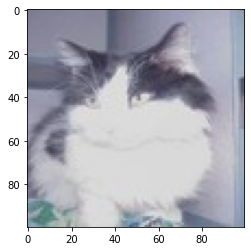

In [96]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,
plt.show()


In [97]:
# model

In [98]:
# layers are stacked up in sequence so we use sequestial
model=Sequential([
    #LAYER_1
    #first in the sequence is convolutional layer , 32 is no of filters,(3,3) is size of the filter,for first layer in kefras we need to mention the size of ouput
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),#just size can be metioned if needed we can used stride also , if not it takes defaut value
    
    #LAYER 2
    Conv2D(32,(3,3),activation='relu'),#no need to mention output like we did in first layer
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation ='sigmoid') #output layer so it has only 1 neuron
])

In [99]:
#other way of representing the model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add( Dense(64,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [100]:
#cost function and back propogartion
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [116]:
#now pass teh input teh data through the model
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.7941 - loss: 0.4541
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8622 - loss: 0.3484
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8767 - loss: 0.2881
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9194 - loss: 0.2177
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9467 - loss: 0.1595
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9603 - loss: 0.1278
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9815 - loss: 0.0699
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.9921 - loss: 0.0436
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9932 - loss: 0.0407
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9984 - loss: 0.0182


In [118]:
#evaluation of model on test dataset
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6089 - loss: 2.1425


[1.684535264968872, 0.6625000238418579]

In [103]:
#making predictions for individual dataset

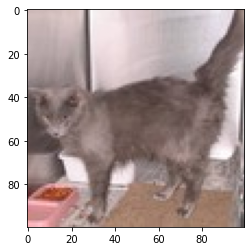

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.9646583]]
cat


In [125]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
Y_predict=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(Y_predict)
# the output is in the form of probability say <0.5 is 0 and >0.5 is 1 just for easy understanding
Y_predict=Y_predict>0.5
if(Y_predict ==0):
    predict="dog"
else:
    predict="cat"
print(predict)
    